In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Task 1: Data Loading and Initial Inspection

In [ ]:
# Loading a dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
mydata = pd.read_csv(url)


In [ ]:
#display 5 rows
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#data types of all columns
mydata.info()
mydata.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
#descriptive statistics of the numerical columns
mydata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#total number of missing values for each column
mydata.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Task 2: Handling Missing Values

In [ ]:
#percentage of missing values in Cabin
str(mydata["Cabin"].isnull().sum()/len(mydata["Cabin"])*100) + "%"

'77.10437710437711%'

### Question:
Do we need to drop the Cabin column entirely from the analysis? Briefly justify your reason.

### Answer:
We need to drop the Cabin column entirely from the analysis because it has 77% missing values, that means it is not useful for analysis. Also, Cabin is not a sensitive data for Titanic dataset. For this reason we can drop the entire column from the analysis.

In [ ]:
#Dropping Cabin Columns
mydata = mydata.drop(columns=['Cabin'])

In [ ]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Find the most frequent port of embarkation
mydata["Embarked"].mode()

,Embarked
0,S


In [ ]:
#Impute the missing values in the Embarked column with the mode
mydata["Embarked"] = mydata["Embarked"].fillna(mydata["Embarked"].mode()[0])
mydata["Embarked"].isnull().sum()

np.int64(0)

In [ ]:
# Find median age
mydata["Age"].median()


28.0

In [ ]:
#Impute the missing values in the Age column with the median age
mydata["Age"] = mydata["Age"].fillna(mydata["Age"].median())
mydata["Age"].isnull().sum()

np.int64(0)

In [ ]:
mydata["Age"].isnull().sum()

np.int64(0)

###Task 3: Univariate Analysis

Survival Rate:

In [ ]:
#Calculate the overall survival rate (percentage of passengers who survived)
survival_rate = mydata["Survived"].mean() * 100
print("Overall survival rate: "+str(survival_rate) + "%")

Overall survival rate: 38.38383838383838%


In [ ]:
# distribution of the Survived variable
survived_counts = mydata["Survived"].value_counts()
survived_counts

,count
Survived,
0,549
1,342


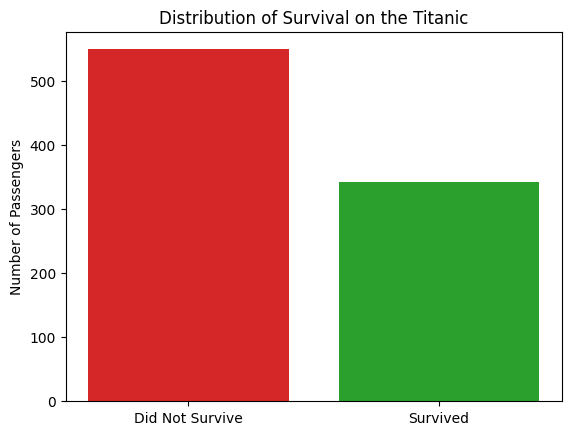

In [ ]:
#Visualize the distribution of the Survived variable  with a bar chart
fig, ax = plt.subplots()
labels = ['Did Not Survive', 'Survived']
bar_colors = ['tab:red', 'tab:green']
ax.bar(labels, survived_counts.values, color=bar_colors)
ax.set_ylabel('Number of Passengers')
ax.set_title('Distribution of Survival on the Titanic')
plt.show()


Passenger Class (Pclass):

/tmp/ipython-input-260130301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=mydata, palette='Set2')


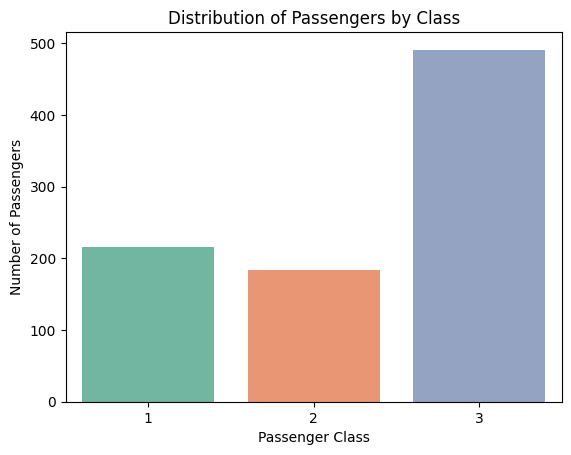

In [ ]:
#Visualize the distribution of Pclass using a count plot.
sns.countplot(x="Pclass", data=mydata, palette='Set2')
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passengers by Class")
plt.show()


In [ ]:
#Identify which class had the most passengers.
most_class = mydata["Pclass"].value_counts().idxmax()
most_count = mydata["Pclass"].value_counts().max()
print(f"The most passengers is Class {most_class} with {most_count} passengers.")

The most passengers is Class 3 with 491 passengers.


Age Distribution:

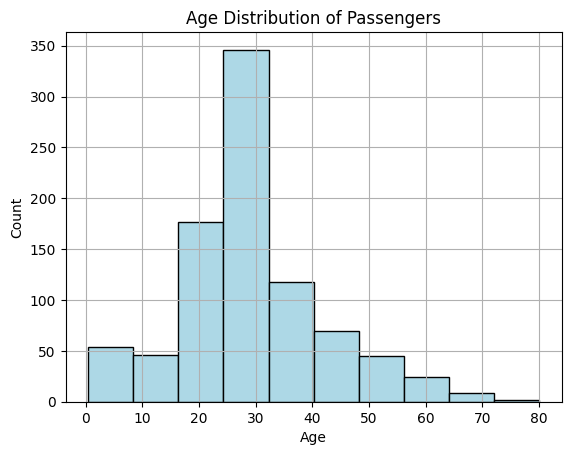

In [ ]:
# histogram of the Age column
mydata["Age"].hist(color='lightblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()

###Task 4: Bivariate and Multivariate Analysis

Survival by Sex:

In [ ]:
# check missing values
print("Missing values before analysis:")
print(mydata[["Sex", "Survived"]].isnull().sum())

Missing values before analysis:
Sex         0
Survived    0
dtype: int64


In [ ]:
# crosstabulation of Survived vs Sex
survival_sex = pd.crosstab(mydata['Sex'], mydata['Survived'])
survival_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


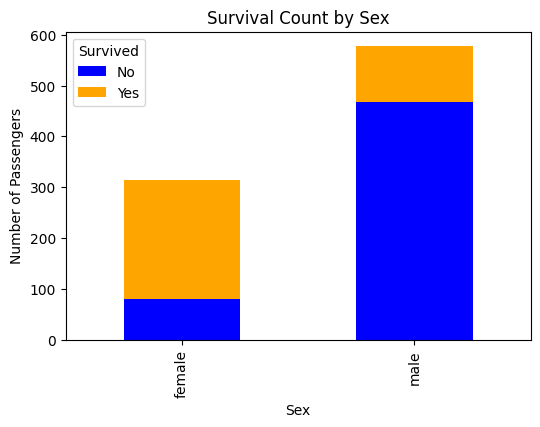

In [ ]:
#Visualize this relationship using a stacked bar chart
survival_sex.plot(kind='bar', stacked=True, color=['blue','orange'], figsize=(6,4))
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

In [ ]:
# Calculate survival rate by gender
mydata.groupby("Sex")["Survived"].mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


###Question: Which gender had a significantly higher survival rate?
###Answer: Female had 74.203822% survival rate on the other hand Male had 18.890815% survival rate.So, Female had a significantly higher survival rate.

Survival by Class (Pclass):

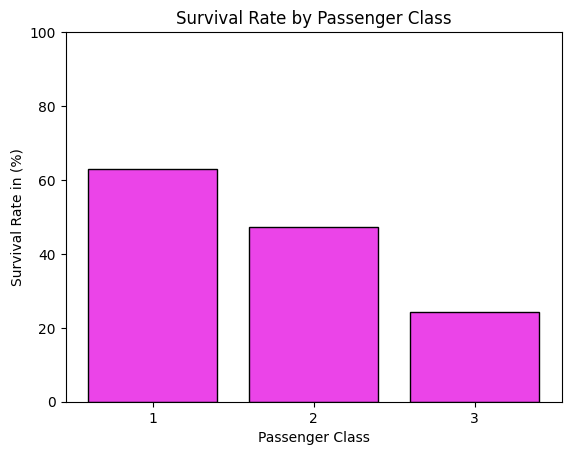

In [ ]:
#visualize the survival rate for each Pclass wit bar plot
survival_rate_class = mydata.groupby("Pclass")["Survived"].mean()*100
plt.bar(survival_rate_class.index, survival_rate_class.values, color='#eb44e8', edgecolor='black')
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate in (%)")
plt.title("Survival Rate by Passenger Class")
plt.xticks([1,2,3])
plt.ylim(0,100)
plt.show()


In [ ]:

mydata.groupby("Pclass")["Survived"].mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


###Question: Is there a clear correlation between ticket class and survival probability?
###Answer:Yes, there is strong positive correlation relationship between class and probability of survival.The higher the class, the greater the probability of survival.

Survival by Age:

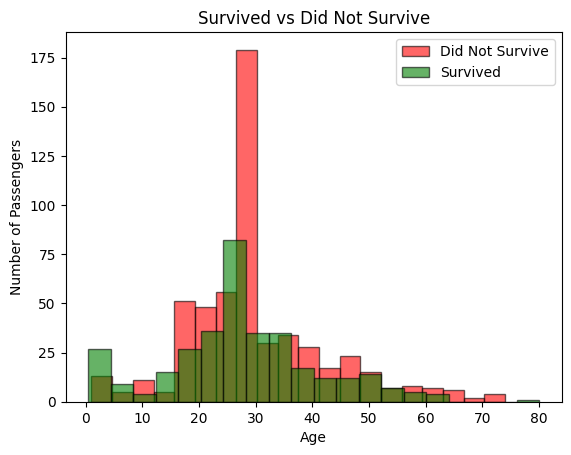

In [ ]:
# Plot and compare the age distribution of survivors vs. non-survivors.
survived = mydata[mydata['Survived'] == 1]['Age']
not_survived = mydata[mydata['Survived'] == 0]['Age']

plt.hist(not_survived, bins=20, alpha=0.6, color='red', label='Did Not Survive', edgecolor='black')
plt.hist(survived, bins=20, alpha=0.6, color='green', label='Survived', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Survived vs Did Not Survive")
plt.legend()
plt.show()



###What does the plot suggest about the survival chances of children and the elderly?
###Observation: The younger age group had greater survival rates, as indicated by taller green bars. The red bars in older age categories were more dominant, meaning that adults and older passengers were less likely to survive.


Survival by Port of Embarkation (Embarked):

In [ ]:
# Calculate  the survival rate for each Embarked port
survival_rate_embarked = mydata.groupby("Embarked")["Survived"].mean()*100
survival_rate_embarked


,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.900929


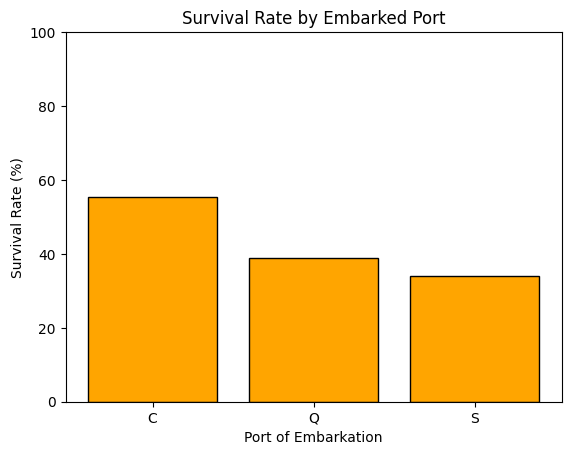

In [ ]:
# visualize the survival rate for each Embarked port.
plt.bar(survival_rate_embarked.index, survival_rate_embarked.values, color='orange', edgecolor='black')
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Embarked Port")
plt.ylim(0,100)
plt.show()


###Task 5: Conclusion and Insights

Based on your EDA, write a brief (3-5 sentences) conclusion summarizing the most significant factors affecting survival on the Titanic. Highlight the top 2-3 features that appear to be the strongest predictors of survival.

###Conclusion and Insights: According to the EDA, the most important determinant of survival in the Titanic were passenger class (Pclass), sex, and age. The higher classes and females passengers were much more likely to survive. Survival rates were also better among younger passengers especially children. Also, those who had embarked at Cherbourg (C) had more chances of survival, which might be related to their travel status. Overall, socioeconomic status and demographics had a significant impact on survival outcomes.